# Wrangle Exercises
---
## Exercises I
Let's review the steps we take at the beginning of each new module.

1. Create a new repository named `regression-exercises` in your GitHub; all of your Regression work will be housed here.
2. Clone this repository within your local `codeup-data-science` directory.
3. Create a `.gitignore` and make sure your list of 'files to ignore' includes your `env.py` file.
4. Ceate a `README.md` file that outlines the contents and purpose of your repository.
5. Add, commit, and push these two files.
6. Now you can add your `env.py` file to this repository to access the Codeup database server.
7. For these exercises, you will create `wrangle.ipynb` and `wrangle.py` files to hold necessary functions.
8. As always, add, commit, and push your work often.
---
## Exercises II
Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# function to write url for sql database
def get_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [2]:
# get url for zillow database
url = get_url('zillow')
# sql query to acquire data
sql = '''
SELECT bedroomcnt, 
       bathroomcnt,
       calculatedfinishedsquarefeet,
       taxvaluedollarcnt,
       yearbuilt,
       taxamount,
       fips
FROM properties_2017
WHERE propertylandusetypeid IN (261, 279);
'''
# assign sql query result (dataframe) to variable
zillow = pd.read_sql(sql, url)
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [38]:
# make function to acquire/cache data
def acquire_zillow():
    '''
    This function takes no arguments and returns a dataframe of 2017 Single Family 
    Residential property data from Zillow. It searches for a csv file (zillow.csv)
    with the requested data and reads that file into a dataframe. If the csv
    file is not found, it retrieves the SQL query result and reads it into a 
    dataframe. It then caches this data into a csv file (zillow.csv).
    '''
    import os
    if os.path.isfile('zillow.csv'):
        zillow = pd.read_csv('zillow.csv', index_col=0)
        return zillow
    else:
        from env import user, password, host
        url = f'mysql+pymysql://{user}:{password}@{host}/zillow'
        sql = '''
        SELECT bedroomcnt, 
               bathroomcnt,
               calculatedfinishedsquarefeet,
               taxvaluedollarcnt,
               yearbuilt,
               taxamount,
               fips
        FROM properties_2017
        WHERE propertylandusetypeid IN (261, 279);
        '''
        zillow = pd.read_sql(sql, url)
        zillow.to_csv('zillow.csv')
        return zillow
# check that function works
zillow = acquire_zillow()
zillow.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [39]:
zillow.shape

(2152864, 7)

In [40]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [41]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [42]:
zillow.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [43]:
zillow[zillow.bedroomcnt.isna()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0
1141340,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0
1324609,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0
1442976,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1647347,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0
1701027,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0
1722708,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776423,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


Both bedroomcnt and bathroomcnt are missing 11 values; the data above shows me that they are missing values in the same rows. Considering there are over 2 million observations in this dataset, I should be able to drop these 11 rows without affecting the data too much.

This spurs another question: if I were to drop all rows with null values, how much of the data would I actually lose?

I know it would be at least 9338 rows since yearbuilt is missing 9338 values. It is definitely more than that though because I can see that some of the 11 rows depicted above are not missing a yearbuilt value. Next I will try to determine the total number of rows containing null values to see if it would be too significant to drop all of those rows.

In [44]:
# create series of bools for whether or not each row contains a null
zillow.isna().any(axis=1)
# count true values in series
zillow.isna().any(axis=1).sum()

12629

There are 12,629 rows containing null values!

In [45]:
# find percentage of zillow's rows with null values
print(f'Proportion of rows with null values in zillow dataset: {((zillow.isna().any(axis=1).sum())/len(zillow)):.2%}')

Proportion of rows with null values in zillow dataset: 0.59%


Only about half a percent of the zillow dataset would be lost if I were to drop all rows with null values. I think that is reasonable and won't compromise the data, so I will go ahead and drop all rows containing null values.

After dropping all null values from the dataset, I will be left with 99.4% of the original data retrieved from the SQL server.

In [46]:
# drop rows with null values, reassign dataframe variable
zillow = zillow.dropna()
# verify rows were dropped
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [47]:
# view value counts for each column
for col in zillow.columns:
    print(col,'\n')
    print(zillow[col].value_counts(),'\n')

bedroomcnt 

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64 

bathroomcnt 

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathroomcnt, dtype: int64 

calculatedfin

Next, I will convert fips and yearbuilt to object dtypes since they are categorical variables. I will leave the other columns as floats since I can work with that dtype in later stages of the pipeline.

In [48]:
# convert dtypes to obj
zillow.fips = zillow['fips'].astype('O') 
zillow.yearbuilt = zillow['yearbuilt'].astype('O')
# confirm dtypes have been changed
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     object 
 5   taxamount                     float64
 6   fips                          object 
dtypes: float64(5), object(2)
memory usage: 130.6+ MB


For ease of use, I will rename some of the columns in this dataframe.

In [49]:
# rename columns
zillow.rename(columns={'bedroomcnt':'beds', 
               'bathroomcnt':'baths', 
               'calculatedfinishedsquarefeet':'sq_ft', 
               'taxvaluedollarcnt':'tax_value'}, inplace=True)
zillow.head()

,beds,baths,sq_ft,tax_value,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


Just from looking at the value counts above, I can see there are a lot of outliers in this data. At this stage, I will view distributions of individual variables and get a better look into the outliers, which I intend to remove.

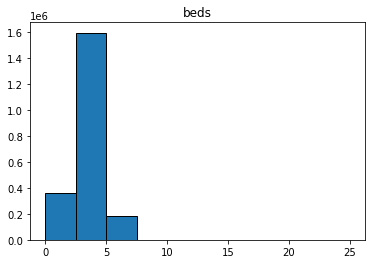

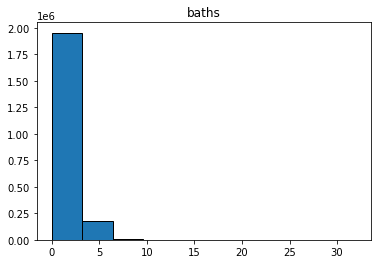

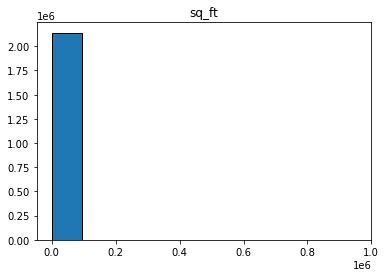

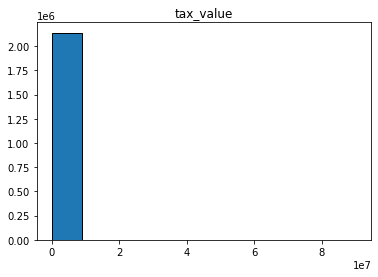

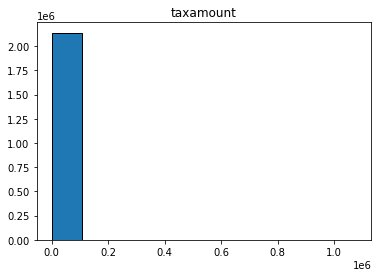

In [50]:
# view histograms of non-categorical columns
for col in zillow.select_dtypes(float):
    zillow[col].hist(bins=10, edgecolor='k')
    plt.title(col)
    plt.grid(False)
    plt.show()

<AxesSubplot:>

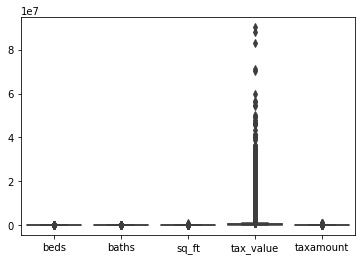

In [51]:
# view boxplots of non-categorical columns
sns.boxplot(data=zillow.select_dtypes(float))

**Takeaways:**
- From the histograms, I know there are outliers in every non-categorical column.
- From the boxplots, I can see right off the bat there are tons of outliers in the tax_value column.
    - There are so many I can't even see the other boxplots
    - I will create individual boxplots for each of these variables to get a better look at them.

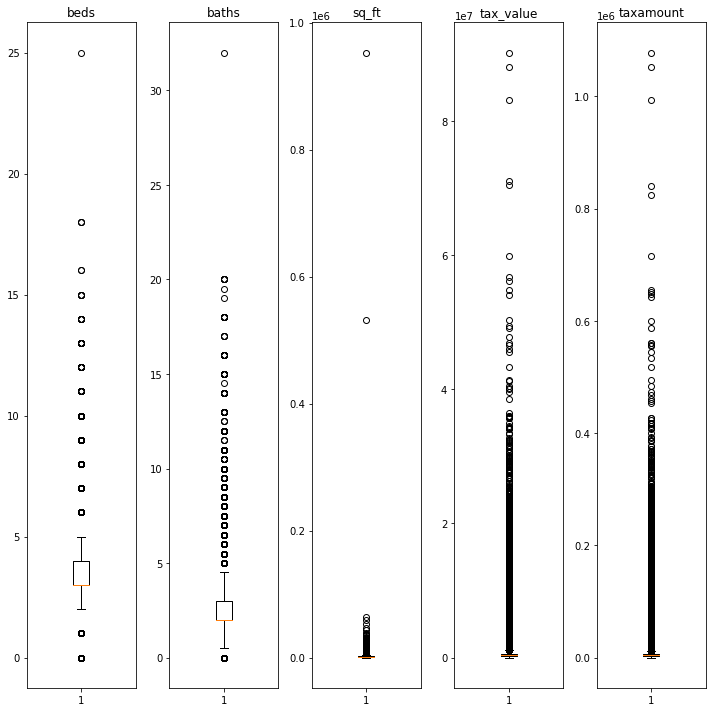

In [52]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(zillow.select_dtypes(float)):
    subplot_num = i + 1
    plt.subplot(1, 5, subplot_num)
    plt.boxplot(zillow[col])
    plt.title(col)
plt.tight_layout()
plt.show();

There are lots of outliers in each of these columns! tax_value and taxamount have the biggest outlier problem.

In [53]:
# from Adam's review!
# allows for viewing descriptive stats w/o excessive scientific notation
# view quartiles
zillow.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,beds,baths,sq_ft,tax_value,taxamount
count,2.14024e+06,2.14024e+06,2.14024e+06,2.14024e+06,2.14024e+06
mean,3.30142,2.24035,1863.19,460642,5616.71
std,0.9326,0.990549,1221.75,677158,7814.56
min,0,0,1,22,6.34
25%,3,2,1258,189166,2540.85
50%,3,2,1623,328296,4111.47
75%,4,3,2208,534606,6411.93
max,25,32,952576,9.01885e+07,1.0781e+06


The majority of the target market will most likely be interested in "regular" houses, or those properties whose attributes fall near the median values in this dataset. Therefore, I will remove outliers and focus on properties in the median range.

In [54]:
# create function to remove outliers
def remove_outliers(zillow, cols, k):
    '''
    This function takes in a dataframe, a list of columns from that dataframe,
    and a k-value (int) which is used to specify the upper and lower bounds 
    for removing outliers. It returns the dataframe with the outliers removed.
    '''
    # make for loop to remove outliers in each column
    for col in cols:
        # get quartiles
        q1, q3 = zillow[col].quantile([.25, .75])
        # compute iqr
        iqr = q3 - q1
        # get cutoff points for removing outliers
        upper = q3 + k * iqr
        lower = q1 - k * iqr
        # remove outliers
        zillow = zillow[(zillow[col]>lower)&(zillow[col]<upper)]
    return zillow

In [61]:
# select columns from which to remove outliers
cols = zillow.select_dtypes(float)
# test function
print(zillow.shape)
print(remove_outliers(zillow, cols, 1.5).shape)

(2140235, 7)
(1854286, 7)


In [62]:
# implement function with before/after print functions just to be double sure it worked
print(f'Shape with outliers: {zillow.shape}')
zillow = remove_outliers(zillow, cols, 1.5)
print(f'Shape with outliers: {zillow.shape}')

(2140235, 7)
(1854286, 7)


3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [64]:
# combine previous steps into a single prep function
def prep_zillow(zillow):
    zillow = zillow.dropna()
    zillow.fips = zillow['fips'].astype('O') 
    zillow.yearbuilt = zillow['yearbuilt'].astype('O')
    zillow.rename(columns={'bedroomcnt':'beds', 
                   'bathroomcnt':'baths', 
                   'calculatedfinishedsquarefeet':'sq_ft', 
                   'taxvaluedollarcnt':'tax_value'}, inplace=True)
    cols = zillow.select_dtypes(float)
    zillow = remove_outliers(zillow, cols, 1.5)
    return zillow

In [68]:
# test function
prep_zillow(acquire_zillow()).info()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   beds       float64
 1   baths      float64
 2   sq_ft      float64
 3   tax_value  float64
 4   yearbuilt  object 
 5   taxamount  float64
 6   fips       object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


In [69]:
# combine acquire and prep functions into single wrangle function
def wrangle_zillow():
    prep_zillow(acquire_zillow())
    return zillow
# test function
wrangle_zillow().info()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   beds       float64
 1   baths      float64
 2   sq_ft      float64
 3   tax_value  float64
 4   yearbuilt  object 
 5   taxamount  float64
 6   fips       object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB
